In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import joblib
import os
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import lightgbm as lgb
from sklearn.model_selection import KFold, train_test_split

C:\Users\Administrator\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
df = pd.read_excel('./data_1.xlsx',index_col=0)

In [5]:
df.head()

,总计划数,消耗金额,充值金额,回款率,新付费创角数,有效消耗占比,有效计划概率,有效消耗金额,有效充值金额,有效获R计划数,有效获R付费能力,有效获R能力,超成本充值金额,超成本计划数,无效消耗充值金额,无效消耗计划数,无效消耗充值金额.1
image_id,,,,,,,,,,,,,,,,,
26109,59,141348.15,48378,0.3423,18,0.1386,0.1695,19594,19594,10,2687.67,1.8000,0,0,28784,49,28784
23509,187,378940.73,134210,0.3542,97,0.2389,0.2406,90532,90532,45,1383.61,2.1556,0,0,43678,142,43678
25832,117,254925.94,80918,0.3174,46,0.0966,0.2308,24636,24636,27,1759.09,1.7037,0,0,56282,90,56282
25825,99,295831.97,67992,0.2298,58,0.1429,0.3131,42286,42286,31,1172.28,1.8710,0,0,25706,68,25706
25694,223,1005506.98,151948,0.1511,137,0.0813,0.3094,81724,81724,69,1109.11,1.9855,37816,7,32408,147,32408


In [6]:
import matplotlib.pyplot as plt

In [7]:
df['有效计划概率'].describe()

count    515.000000
mean       0.051973
std        0.105569
min        0.000000
25%        0.000000
50%        0.000000
75%        0.076900
max        1.000000
Name: 有效计划概率, dtype: float64

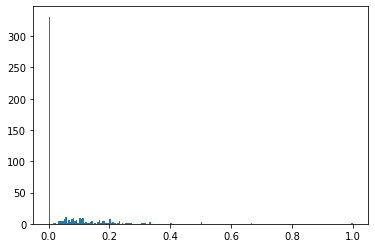

In [20]:
num_bins=200
plt.hist(df['有效计划概率'],num_bins)
plt.show()

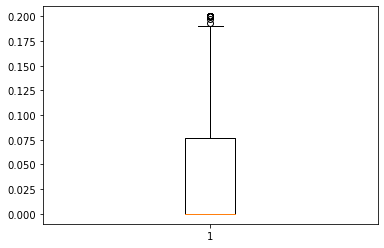

In [26]:
plt.boxplot(np.clip(df['有效计划概率'],0,0.2))
plt.show()

In [ ]:
# 0.05  0.075  0.1  0.2

In [27]:
df['有效计划概率_sorce'] = df['有效计划概率'].apply(lambda x:1 if x<0.05 else(2 if x<0.075 else (3 if x<0.1 else(4 if x<0.2 else 5))))

In [50]:
df['有效计划概率_sorce'].value_counts()

1    350
4     68
5     39
3     29
2     29
Name: 有效计划概率_sorce, dtype: int64

In [28]:
df['有效获R付费能力'].describe()

count      515.000000
mean       174.068311
std        842.419102
min          0.000000
25%          0.000000
50%          0.000000
75%         90.250000
max      16646.000000
Name: 有效获R付费能力, dtype: float64

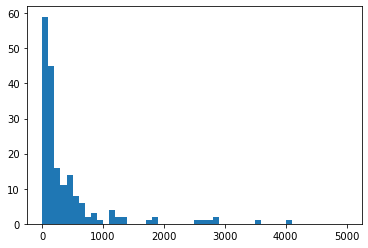

In [31]:
num_bins=50
plt.hist(df['有效获R付费能力'],num_bins,range=(0.1,5000))
plt.show()

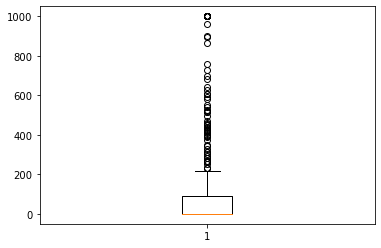

In [33]:
plt.boxplot(np.clip(df['有效获R付费能力'],0,1000))
plt.show()

In [ ]:
# 90,200,500,1000

In [48]:
df['有效获R付费能力_sorce'] = df['有效获R付费能力'].apply(lambda x:5 if x>=1000 else(4 if x>=500 else (3 if x>=200 else(2 if x>=90 else 1))))

In [49]:
df['有效获R付费能力_sorce'].value_counts()

1    385
2     50
3     41
4     20
5     19
Name: 有效获R付费能力_sorce, dtype: int64

In [35]:
df['有效获R能力'].describe()


count    515.000000
mean       0.449245
std        0.648502
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.500000
Name: 有效获R能力, dtype: float64

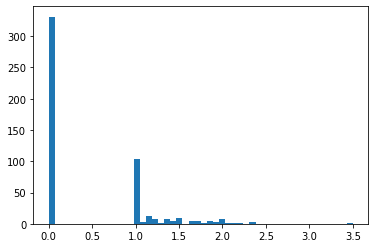

In [36]:
num_bins=50
plt.hist(df['有效获R能力'],num_bins)
plt.show()

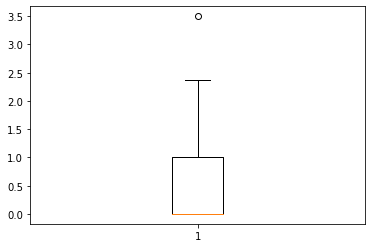

In [37]:
plt.boxplot(np.clip(df['有效获R能力'],0,1000))
plt.show()

In [ ]:
# 1,1.3,1.8,2.2

In [45]:
df['有效获R能力_sorce'] = df['有效获R能力'].apply(lambda x:5 if x>=2.2 else(4 if x>=1.8 else (3 if x>=1.3 else(2 if x>=1 else 1))))

In [47]:
df['有效获R能力_sorce'].value_counts()

1    331
2    127
3     33
4     20
5      4
Name: 有效获R能力_sorce, dtype: int64

In [51]:
df.head()

,总计划数,消耗金额,充值金额,回款率,新付费创角数,有效消耗占比,有效计划概率,有效消耗金额,有效充值金额,有效获R计划数,有效获R付费能力,有效获R能力,超成本充值金额,超成本计划数,无效消耗充值金额,无效消耗计划数,无效消耗充值金额.1,有效计划概率_sorce,有效获R付费能力_sorce,有效获R能力_sorce
image_id,,,,,,,,,,,,,,,,,,,,
26109,59,141348.15,48378,0.3423,18,0.1386,0.1695,19594,19594,10,2687.67,1.8000,0,0,28784,49,28784,4,5,4
23509,187,378940.73,134210,0.3542,97,0.2389,0.2406,90532,90532,45,1383.61,2.1556,0,0,43678,142,43678,5,5,4
25832,117,254925.94,80918,0.3174,46,0.0966,0.2308,24636,24636,27,1759.09,1.7037,0,0,56282,90,56282,5,5,3
25825,99,295831.97,67992,0.2298,58,0.1429,0.3131,42286,42286,31,1172.28,1.8710,0,0,25706,68,25706,5,5,4
25694,223,1005506.98,151948,0.1511,137,0.0813,0.3094,81724,81724,69,1109.11,1.9855,37816,7,32408,147,32408,5,5,4


In [52]:
df['sorce'] = df['有效计划概率_sorce']+df['有效获R付费能力_sorce']+df['有效获R能力_sorce']

In [53]:
df.to_excel('./data.xlsx')

In [63]:
df_image = pd.read_excel('./df_image.xlsx')

In [64]:
df_image.head()

,tdate,id,image_id,素材名称,ad_account_id,media_id,总播放次数,有效播放数,有效播放率,播放完成数,视频数据-播完率,视频数据-2秒播放率,视频数据-3秒播放率,视频数据-5秒播放率,视频数据-10秒播放率,视频数据-25%进度播放率,视频数据-50%进度播放率,视频数据-75%进度播放率,视频数据-99%进度播放率,视频数据-平均单次播放时长,互动数据-分享数,互动数据-评论数,互动数据-点赞数,互动数据-不感兴趣数,互动数据-新增关注数,互动数据-私信数,互动数据-举报数,创建时间
0,1/10/2020,31783,16316.0,SSR123-竖版,5101,10,15452,5156,0.3433,4346,0.2813,0.5599,0.4232,0.3721,0.3337,0.3785,0.3346,0.3172,0.2877,7.08,0,1,37,0,0,0,0,2/10/2020 08:02:33
1,1/10/2020,31783,16316.0,SSR123-竖版,6123,10,16650,6469,0.3996,5507,0.3308,0.5460,0.4529,0.4171,0.3885,0.4218,0.3908,0.3728,0.3368,7.83,0,3,42,2,0,0,1,2/10/2020 08:02:35
2,1/10/2020,32174,16276.0,SSR114-竖版-088.089合体版本（改繁体字）,5893,10,611,27,0.0449,18,0.0295,0.1227,0.0966,0.0638,0.0442,0.0311,0.0311,0.0295,0.0295,2.21,0,0,0,0,0,0,0,2/10/2020 08:04:11
3,1/10/2020,34881,17107.0,ZDZL127-横版,5646,10,15854,1337,0.0151,1208,0.0762,0.2257,0.1330,0.0723,0.0843,0.1156,0.0856,0.0793,0.0763,2.19,0,0,6,0,0,0,0,2/10/2020 08:01:20
4,1/10/2020,40000,17360.0,ZDZL149-横版改,5646,10,906,91,0.0803,28,0.0309,0.3256,0.2660,0.1854,0.1004,0.1082,0.0806,0.0684,0.0309,4.00,0,0,0,0,0,0,0,2/10/2020 08:01:20


In [69]:
df_image.drop(df_image[df_image['image_id'].isna()].index,inplace=True)

In [71]:
df_image['image_id'] = df_image['image_id'].astype(int)

In [74]:
df = df.reset_index()

In [75]:
df['image_id'] = df['image_id'].astype(int)

In [92]:
temp = df[['image_id','sorce','回款率']]

In [93]:
result = pd.merge(df_image,temp,how='left',validate='many_to_one')

In [94]:
result.head()

,tdate,id,image_id,素材名称,ad_account_id,media_id,总播放次数,有效播放数,有效播放率,播放完成数,视频数据-播完率,视频数据-2秒播放率,视频数据-3秒播放率,视频数据-5秒播放率,视频数据-10秒播放率,视频数据-25%进度播放率,视频数据-50%进度播放率,视频数据-75%进度播放率,视频数据-99%进度播放率,视频数据-平均单次播放时长,互动数据-分享数,互动数据-评论数,互动数据-点赞数,互动数据-不感兴趣数,互动数据-新增关注数,互动数据-私信数,互动数据-举报数,创建时间,sorce,回款率
0,1/10/2020,31783,16316,SSR123-竖版,5101,10,15452,5156,0.3433,4346,0.2813,0.5599,0.4232,0.3721,0.3337,0.3785,0.3346,0.3172,0.2877,7.08,0,1,37,0,0,0,0,2/10/2020 08:02:33,3.0,0.0
1,1/10/2020,31783,16316,SSR123-竖版,6123,10,16650,6469,0.3996,5507,0.3308,0.5460,0.4529,0.4171,0.3885,0.4218,0.3908,0.3728,0.3368,7.83,0,3,42,2,0,0,1,2/10/2020 08:02:35,3.0,0.0
2,1/10/2020,32174,16276,SSR114-竖版-088.089合体版本（改繁体字）,5893,10,611,27,0.0449,18,0.0295,0.1227,0.0966,0.0638,0.0442,0.0311,0.0311,0.0295,0.0295,2.21,0,0,0,0,0,0,0,2/10/2020 08:04:11,3.0,0.0
3,1/10/2020,34881,17107,ZDZL127-横版,5646,10,15854,1337,0.0151,1208,0.0762,0.2257,0.1330,0.0723,0.0843,0.1156,0.0856,0.0793,0.0763,2.19,0,0,6,0,0,0,0,2/10/2020 08:01:20,NaN,NaN
4,1/10/2020,40000,17360,ZDZL149-横版改,5646,10,906,91,0.0803,28,0.0309,0.3256,0.2660,0.1854,0.1004,0.1082,0.0806,0.0684,0.0309,4.00,0,0,0,0,0,0,0,2/10/2020 08:01:20,NaN,NaN


In [95]:
result.shape

(28802, 30)

In [96]:
result['sorce'].isna().sum()

22724

In [97]:
result.drop(result[result['sorce'].isna()].index,inplace=True)

In [98]:
result.shape

(6078, 30)

In [100]:
result.corr()['回款率'].sort_values()

视频数据-2秒播放率      -0.030495
视频数据-平均单次播放时长   -0.005539
视频数据-3秒播放率       0.003370
视频数据-播完率         0.011071
视频数据-99%进度播放率    0.013981
image_id         0.023296
视频数据-10秒播放率      0.025616
有效播放率            0.026399
视频数据-75%进度播放率    0.031028
id               0.035668
视频数据-50%进度播放率    0.038727
视频数据-25%进度播放率    0.040443
视频数据-5秒播放率       0.046835
互动数据-分享数         0.056338
ad_account_id    0.079787
互动数据-举报数         0.104264
互动数据-评论数         0.108300
总播放次数            0.121623
互动数据-点赞数         0.125174
互动数据-不感兴趣数       0.143135
有效播放数            0.146929
播放完成数            0.151082
sorce            0.691875
回款率              1.000000
media_id              NaN
互动数据-新增关注数            NaN
互动数据-私信数              NaN
Name: 回款率, dtype: float64

In [102]:
result.corr()['sorce'].sort_values()

id              -0.024862
image_id        -0.011829
视频数据-平均单次播放时长    0.002247
视频数据-播完率         0.006187
视频数据-99%进度播放率    0.008025
视频数据-75%进度播放率    0.021671
有效播放率            0.025921
ad_account_id    0.029136
视频数据-10秒播放率      0.030876
视频数据-50%进度播放率    0.032615
视频数据-2秒播放率       0.037153
视频数据-25%进度播放率    0.045134
视频数据-3秒播放率       0.062377
视频数据-5秒播放率       0.094709
互动数据-分享数         0.100916
互动数据-举报数         0.142823
互动数据-评论数         0.153565
互动数据-不感兴趣数       0.182381
互动数据-点赞数         0.182495
播放完成数            0.188268
总播放次数            0.189948
有效播放数            0.203763
回款率              0.691875
sorce            1.000000
media_id              NaN
互动数据-新增关注数            NaN
互动数据-私信数              NaN
Name: sorce, dtype: float64